In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import ticker
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10, 8)

RELOAD = True

In [2]:
if RELOAD:
    from importlib import reload
    try:
        reload(recopilar_data)
    except NameError:
        import recopilar_data
    

data_raw = pd.read_csv('alldata.dat', sep='\s+')

data_raw.head(10)

,eps_12,n_surf,temp,job,superposicion
0,0.7,50,0.8,2,0.091527
1,0.7,50,0.8,3,0.148387
2,0.7,50,0.8,1,0.157627
3,0.7,50,0.9,2,0.100547
4,0.7,50,0.9,3,0.087927
5,0.7,50,0.9,1,0.114880
6,0.7,50,0.7,2,0.220433
7,0.7,50,0.7,3,0.187760
8,0.7,50,0.7,1,0.194513
9,0.7,50,0.6,2,0.180700


In [3]:
data = data_raw.groupby(['eps_12','n_surf', 'temp'], as_index=False).mean().drop('job', axis=1)

data.head()

,eps_12,n_surf,temp,superposicion
0,0.5,10,0.2,0.930131
1,0.5,10,0.3,1.397673
2,0.5,10,0.4,1.203304
3,0.5,10,0.5,0.799880
4,0.5,10,0.6,0.721136


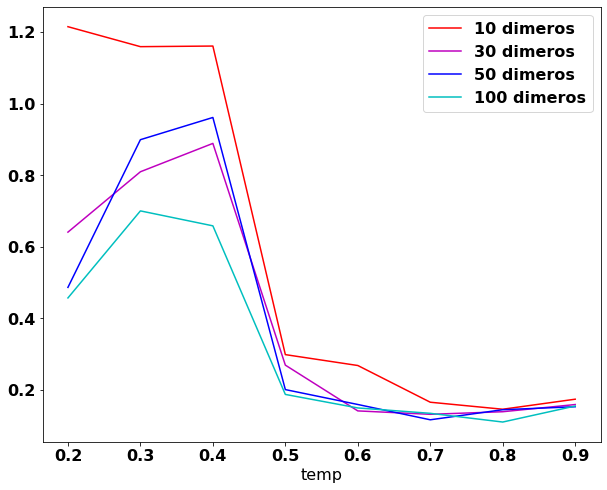

In [8]:
from itertools import cycle
fig, ax = plt.subplots()

colors = cycle('rmbcyg')

eps = 0.7
# for dens, color in zip(denss, colors): 
for n, color in zip(data['n_surf'].unique(),colors):
    data3 = data[(data['n_surf']==n) & (data['eps_12'] == eps)]
    data3.plot(
        'temp', 'superposicion', color=color,
        kind='line', label=f'{n} dimeros', ax=ax
        )
    # ax.plot(x, dens*x, color=color)

# ax.set_xlim(0.5,0.9)
# ax.set_ylim(-0.002,0.05)

In [5]:


# configs = [     # (densidad, temperatura)
#     (eps, n_surf)
#     for eps in [0.5, 0.7, 0.8]
#     for n_surf in [10, 30, 50, 100]
# ]

# temps = [0.5, 0.6, 0.7, 0.8, 0.9]

# import os
# from pathlib import Path

# for eps, n_surf in configs:
#     base = Path(f'data/{eps:.1f}_eps/{n_surf:03}_surf/')

#     fig, ax = plt.subplots()
#     lines = cycle(['-','--', '-.', ':'])
#     for t, ls in zip(temps, lines):
#         ruta = base / f'{t:.2f}_temp'
#         yes1 = []
#         yes2 = []
#         for jobdir in os.listdir(ruta):
#             file = ruta / jobdir / 'perfil.dat'
#             try:
#                 x, y1, y2 = np.loadtxt(file, unpack=True, skiprows=1)
#             except:
#                 continue
#             yes1.append(y1)
#             yes2.append(y2)
        
#         y1 = np.mean(yes1, axis=0)
#         y2 = np.mean(yes2, axis=0)
   
#         ax.plot(x,y1, ls=ls, color='b', label=f'T={t:.1f}')
#         ax.plot(x,y2, ls=ls, color='r')

#     ax.legend()
#     ax.set_title(f'{eps=}, {n_surf=}')



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


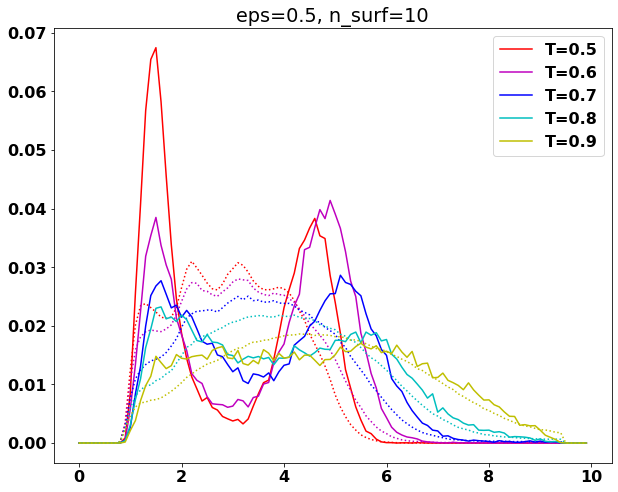

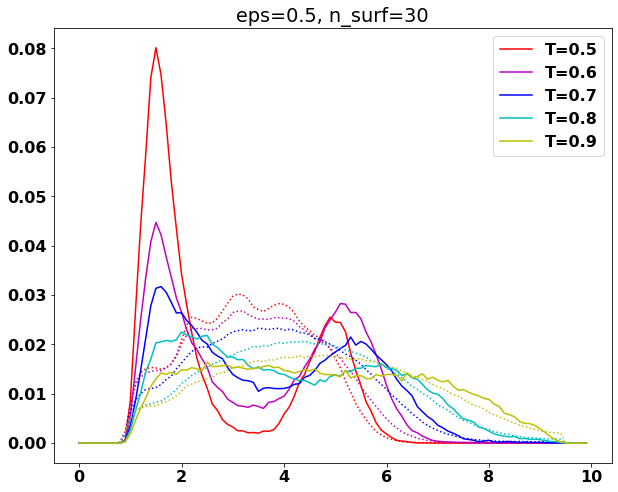

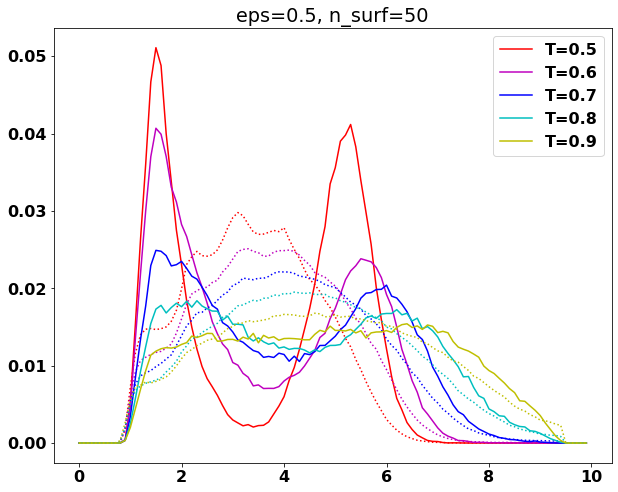

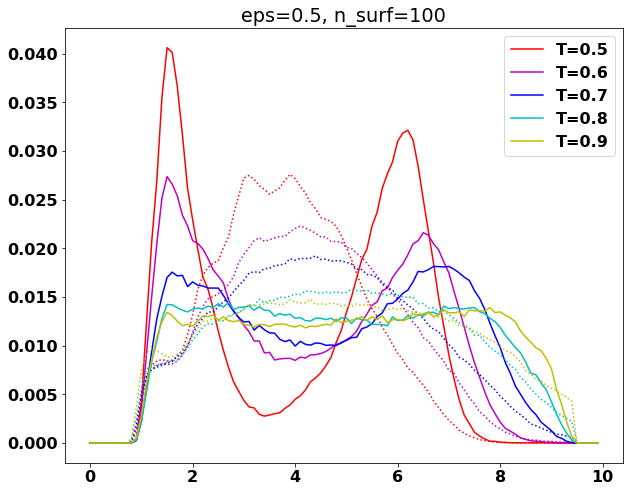

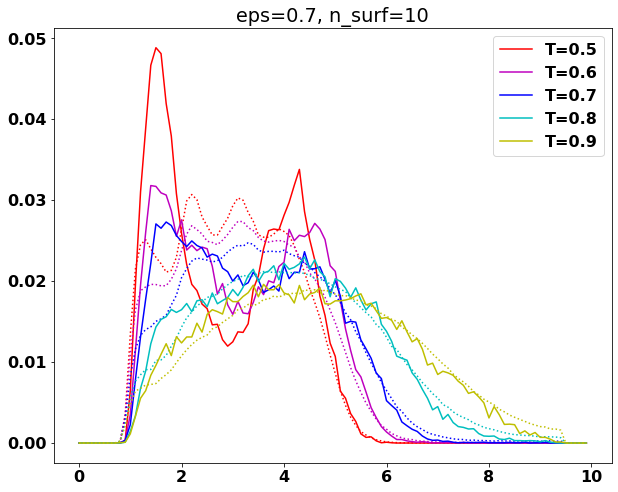

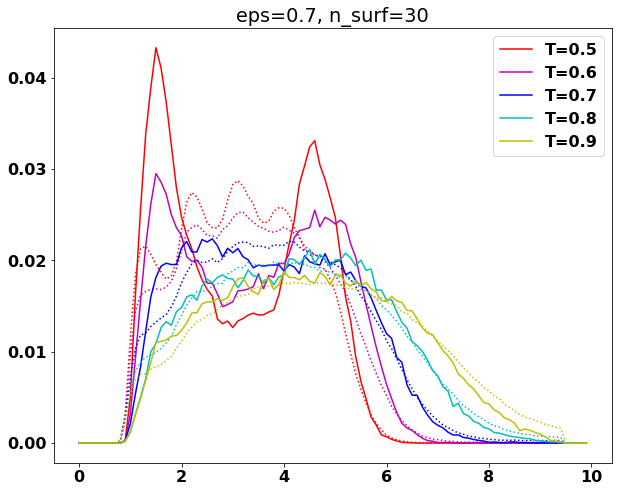

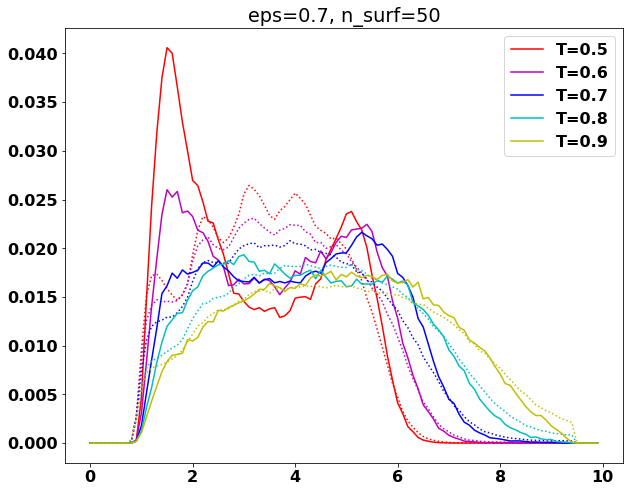

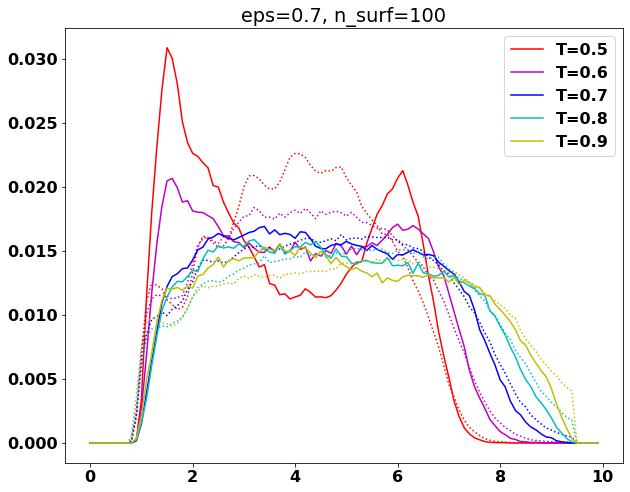

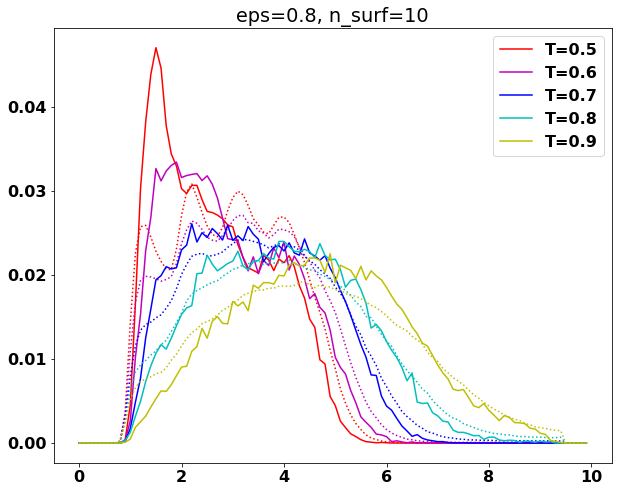

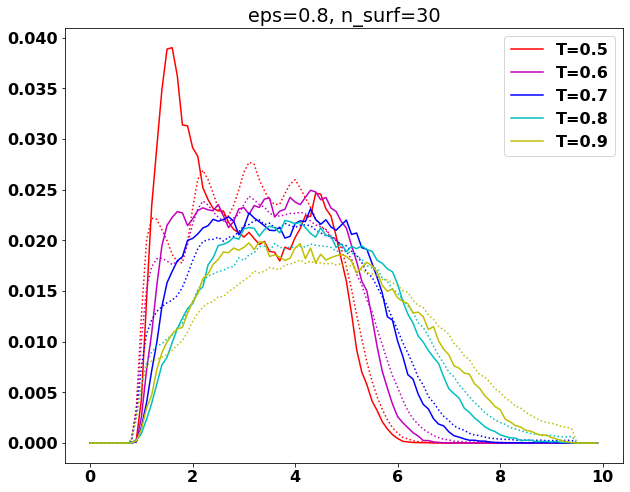

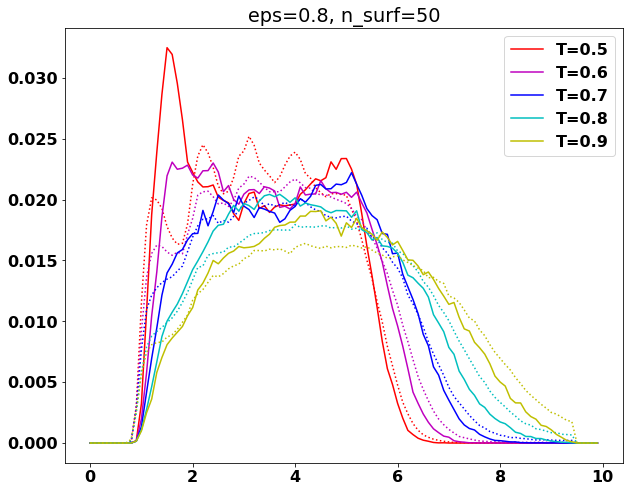

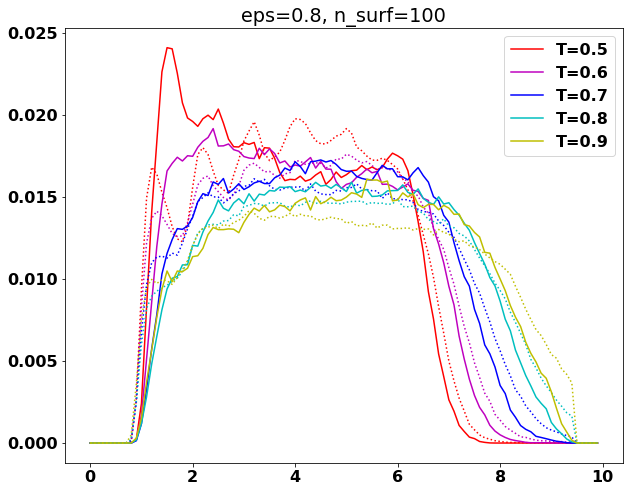

In [6]:


configs = [     # (densidad, temperatura)
    (eps, n_surf)
    for eps in [0.5, 0.7, 0.8]
    for n_surf in [10, 30, 50, 100]
]

temps = [0.5, 0.6, 0.7, 0.8, 0.9]

import os
from pathlib import Path

for eps, n_surf in configs:
    base = Path(f'data/{eps:.1f}_eps/{n_surf:03}_surf/')

    fig, ax = plt.subplots()
    colors = cycle('rmbcyg')
    for t, c in zip(temps, colors):
        ruta = base / f'{t:.2f}_temp'
        yes1 = []
        yes2 = []
        for jobdir in os.listdir(ruta):
            file = ruta / jobdir / 'perfil.dat'
            try:
                x, y1, y2 = np.loadtxt(file, unpack=True, skiprows=1)
            except:
                continue
            yes1.append(y1)
            yes2.append(y2)
        
        y1 = np.mean(yes1, axis=0)
        y2 = np.mean(yes2, axis=0)
   
        ax.plot(x,y1, ls=':', color=c)
        ax.plot(x,y2, ls='-', color=c, label=f'T={t:.1f}')
        
    ax.legend()
    ax.set_title(f'{eps=}, {n_surf=}')

